In [131]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics

In [132]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [133]:
ames = pd.read_csv('../data/model_variables.csv').drop(columns = 'Unnamed: 0')
test = pd.read_csv('../data/final_test.csv')

In [134]:
ames.head(30)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,3,69.0,13517,3,2,4,3,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,2,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,4,0,1,1976.0,2,2.0,475.0,2,3,2,0,44,0,0,0,0,1,1,0,3,2010,130500
1,544,531379050,60,3,43.0,11492,3,2,4,3,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,2,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,4,1,3,1997.0,2,2.0,559.0,2,3,2,0,74,0,0,0,0,1,1,0,4,2009,220000
2,153,535304180,20,3,68.0,7922,4,2,4,3,5,7,1953,2007,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,3,2,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,4,0,1,1953.0,1,1.0,246.0,1,3,2,0,52,0,0,0,0,1,1,0,1,2010,109000
3,318,916386060,60,3,73.0,9802,4,2,4,3,5,5,2006,2007,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,384.0,4,2,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,4,0,1,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,1,1,0,4,2010,174000
4,255,906425045,50,3,82.0,14235,3,2,4,3,6,8,1900,1993,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,676.0,3,2,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,4,0,1,1957.0,1,2.0,484.0,1,3,0,0,59,0,0,0,0,1,1,0,3,2010,138500
5,138,535126040,20,3,137.0,16492,3,2,4,3,6,6,1966,2002,0.0,4,3,3,3,1,5,247.0,3,713.0,557.0,1517.0,5,2,4,1888,0,0,1888,0.0,0.0,2,1,2,1,4,6,2,1,4,1966.0,3,2.0,578.0,3,3,2,0,0,0,0,0,0,1,1,0,6,2010,190000
6,2827,908186070,180,1,35.0,3675,4,2,4,3,6,5,2005,2006,82.0,3,3,4,3,4,6,547.0,1,0.0,0.0,547.0,4,2,4,1072,0,0,1072,1.0,0.0,2,0,2,1,3,5,4,0,1,2005.0,3,2.0,525.0,3,3,2,0,44,0,0,0,0,1,1,0,6,2006,140000
7,145,535154050,20,3,69.0,12160,3,2,4,3,5,5,1959,1959,180.0,3,3,3,3,1,3,1000.0,1,0.0,188.0,1188.0,2,2,4,1188,0,0,1188,1.0,0.0,1,0,3,1,3,6,4,0,1,1959.0,2,2.0,531.0,2,3,2,0,0,0,0,0,0,1,3,0,5,2010,142000
8,1942,535353130,20,3,69.0,15783,4,2,4,3,5,5,1952,1952,0.0,3,3,3,3,1,3,292.0,1,0.0,632.0,924.0,3,2,4,924,0,0,924,0.0,0.0,1,0,2,1,3,6,4,0,1,1952.0,1,1.0,420.0,1,3,2,0,324,0,0,0,0,1,3,400,6,2007,112500
9,1956,535426130,60,3,70.0,11606,3,4,4,1,5,5,1969,1969,192.0,3,3,4,3,3,3,650.0,1,0.0,390.0,1040.0,3,2,4,1040,1040,0,2080,0.0,1.0,1,2,5,1,2,9,4,2,3,1969.0,1,2.0,504.0,1,3,2,335,0,0,0,0,0,1,1,0,9,2007,135000


In [135]:
#Dropping the indexing columns. Not need for eval and selection
ames = ames.drop(columns = ['pid'])

In [136]:
ames.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
0,109,60,3,69.0,13517,3,2,4,3,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,2,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,4,0,1,1976.0,2,2.0,475.0,2,3,2,0,44,0,0,0,0,1,1,0,3,2010,130500
1,544,60,3,43.0,11492,3,2,4,3,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,2,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,4,1,3,1997.0,2,2.0,559.0,2,3,2,0,74,0,0,0,0,1,1,0,4,2009,220000
2,153,20,3,68.0,7922,4,2,4,3,5,7,1953,2007,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,3,2,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,4,0,1,1953.0,1,1.0,246.0,1,3,2,0,52,0,0,0,0,1,1,0,1,2010,109000
3,318,60,3,73.0,9802,4,2,4,3,5,5,2006,2007,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,384.0,4,2,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,4,0,1,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,1,1,0,4,2010,174000
4,255,50,3,82.0,14235,3,2,4,3,6,8,1900,1993,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,676.0,3,2,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,4,0,1,1957.0,1,2.0,484.0,1,3,0,0,59,0,0,0,0,1,1,0,3,2010,138500


In [137]:
ames.corr()[['saleprice']].sort_values(by='saleprice', ascending = False)
           

,saleprice
saleprice,1.000000
overall_qual,0.799842
exter_qual,0.715500
gr_liv_area,0.695532
kitchen_qual,0.689985
garage_area,0.645878
garage_cars,0.644316
total_bsmt_sf,0.628603
1st_flr_sf,0.626959
bsmt_qual,0.605340


In [138]:
#Going to drop the last 12 columns because of low  correlation to sp
ames = ames.drop(columns = ['lot_shape','fence','kitchen_abvgr','enclosed_porch','overall_cond',
                           'ms_subclass','land_slope','bsmt_half_bath','low_qual_fin_sf','yr_sold',
                           'bsmtfin_type_2','misc_val'])

In [139]:
ames.head(10)

,id,ms_zoning,lot_frontage,lot_area,land_contour,utilities,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,3ssn_porch,screen_porch,pool_area,pool_qc,mo_sold,saleprice
0,109,3,69.0,13517,2,4,6,1976,2005,289.0,4,3,3,3,1,6,533.0,0.0,192.0,725.0,5,2,4,725,754,1479,0.0,2,1,3,4,6,4,0,1,1976.0,2,2.0,475.0,2,3,2,0,44,0,0,0,1,3,130500
1,544,3,43.0,11492,2,4,7,1996,1997,132.0,4,3,4,3,1,6,637.0,0.0,276.0,913.0,5,2,4,913,1209,2122,1.0,2,1,4,4,8,4,1,3,1997.0,2,2.0,559.0,2,3,2,0,74,0,0,0,1,4,220000
2,153,3,68.0,7922,2,4,5,1953,2007,0.0,3,4,3,3,1,6,731.0,0.0,326.0,1057.0,3,2,4,1057,0,1057,1.0,1,0,3,4,5,4,0,1,1953.0,1,1.0,246.0,1,3,2,0,52,0,0,0,1,1,109000
3,318,3,73.0,9802,2,4,5,2006,2007,0.0,3,3,4,3,1,1,0.0,0.0,384.0,384.0,4,2,4,744,700,1444,0.0,2,1,3,3,7,4,0,1,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,1,4,174000
4,255,3,82.0,14235,2,4,6,1900,1993,0.0,3,3,2,4,1,1,0.0,0.0,676.0,676.0,3,2,4,831,614,1445,0.0,2,0,3,3,6,4,0,1,1957.0,1,2.0,484.0,1,3,0,0,59,0,0,0,1,3,138500
5,138,3,137.0,16492,2,4,6,1966,2002,0.0,4,3,3,3,1,5,247.0,713.0,557.0,1517.0,5,2,4,1888,0,1888,0.0,2,1,2,4,6,2,1,4,1966.0,3,2.0,578.0,3,3,2,0,0,0,0,0,1,6,190000
6,2827,1,35.0,3675,2,4,6,2005,2006,82.0,3,3,4,3,4,6,547.0,0.0,0.0,547.0,4,2,4,1072,0,1072,1.0,2,0,2,3,5,4,0,1,2005.0,3,2.0,525.0,3,3,2,0,44,0,0,0,1,6,140000
7,145,3,69.0,12160,2,4,5,1959,1959,180.0,3,3,3,3,1,3,1000.0,0.0,188.0,1188.0,2,2,4,1188,0,1188,1.0,1,0,3,3,6,4,0,1,1959.0,2,2.0,531.0,2,3,2,0,0,0,0,0,1,5,142000
8,1942,3,69.0,15783,2,4,5,1952,1952,0.0,3,3,3,3,1,3,292.0,0.0,632.0,924.0,3,2,4,924,0,924,0.0,1,0,2,3,6,4,0,1,1952.0,1,1.0,420.0,1,3,2,0,324,0,0,0,1,6,112500
9,1956,3,70.0,11606,4,4,5,1969,1969,192.0,3,3,4,3,3,3,650.0,0.0,390.0,1040.0,3,2,4,1040,1040,2080,0.0,1,2,5,2,9,4,2,3,1969.0,1,2.0,504.0,1,3,2,335,0,0,0,0,1,9,135000


In [140]:
ames.describe()

,id,ms_zoning,lot_frontage,lot_area,land_contour,utilities,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,3ssn_porch,screen_porch,pool_area,pool_qc,mo_sold,saleprice
count,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000
mean,1483.006743,2.679461,69.482365,10243.909232,2.106328,3.998963,6.080394,1970.539419,1983.414938,98.432573,3.383817,3.094917,3.469917,2.932054,1.672718,3.577282,449.056017,50.535270,563.113071,1062.704357,4.130187,1.869295,3.885373,1172.570021,322.870332,1500.914419,0.431017,1.562759,0.360477,2.868257,3.497407,6.464730,3.874481,0.605290,2.270747,1977.573665,1.713174,1.767635,470.386411,1.713174,2.813278,1.839730,96.488071,44.644191,2.595954,17.245332,2.550830,1.011411,6.209544,180746.616183
std,843.726231,0.748604,21.109980,6840.285074,0.474138,0.045549,1.398446,29.677780,20.891347,170.358344,0.578985,0.372672,0.895777,0.569096,1.063253,2.064161,464.534069,168.736096,442.897246,452.365637,0.964422,0.494423,0.399577,398.334087,425.808460,507.350653,0.524850,0.550702,0.499334,0.829070,0.663367,1.558678,0.500972,0.642964,1.337781,24.518970,0.898706,0.770466,216.374350,0.898706,0.711963,0.524183,130.599988,64.090199,25.449791,58.668777,38.964736,0.179009,2.739072,79501.594667
min,1.000000,1.000000,21.000000,1300.000000,1.000000,2.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,12789.000000
25%,767.750000,3.000000,60.000000,7657.250000,2.000000,4.000000,5.000000,1953.000000,1964.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,217.000000,798.000000,3.000000,2.000000,4.000000,886.750000,0.000000,1120.000000,0.000000,1.000000,0.000000,2.000000,3.000000,5.000000,4.000000,0.000000,1.000000,1961.000000,1.000000,1.000000,312.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,129237.500000
50%,1491.500000,3.000000,69.000000,9555.500000,2.000000,4.000000,6.000000,1972.000000,1991.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,375.000000,0.000000,474.000000,1000.500000,5.000000,2.000000,4.000000,1097.000000,0.000000,1443.000000,0.000000,2.000000,0.000000,3.000000,3.000000,6.000000,4.000000,1.000000,2.000000,1978.707796,2.000000,2.000000,477.000000,2.000000,3.000000,2.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,6.000000,160000.000000
75%,2206.250000,3.000000,78.000000,11673.250000,2.000000,4.000000,7.000000,1999.000000,2003.000000,160.000000,4.000000,3.000000,4.000000,3.000000,2.000000,6.000000,738.250000,0.000000,806.500000,1324.000000,5.000000,2.000000,4.000000,1414.000000,684.000000,1733.000000,1.000000,2.000000,1.000000,3.000000,4.000000,7.000000,4.000000,1.000000,4.000000,2000.000000,2.0

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


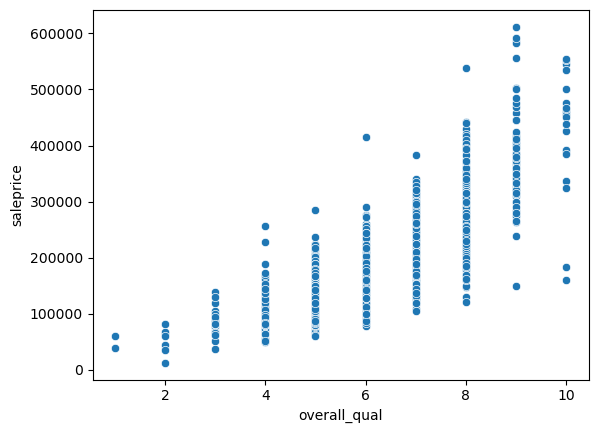

In [141]:
#Visualizing variables with highest corr to saleprice
sns.scatterplot(ames['overall_qual'], ames.saleprice);

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_qual'>

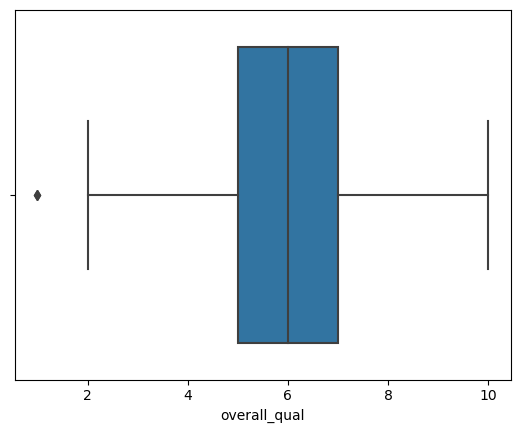

In [142]:
sns.boxplot(ames['overall_qual'])

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


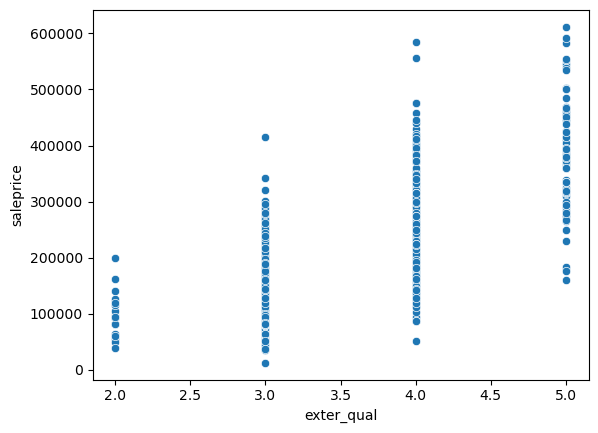

In [143]:
sns.scatterplot(ames['exter_qual'], ames.saleprice);

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exter_qual'>

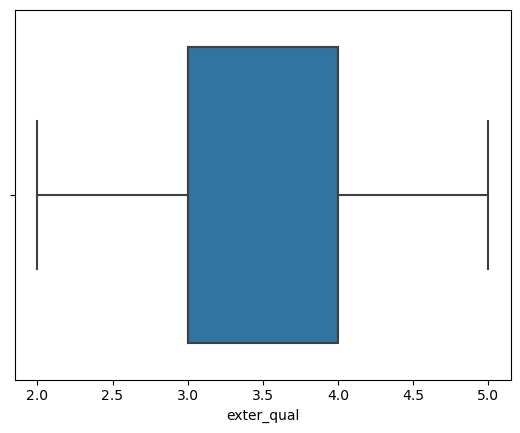

In [144]:
sns.boxplot(ames['exter_qual'])

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


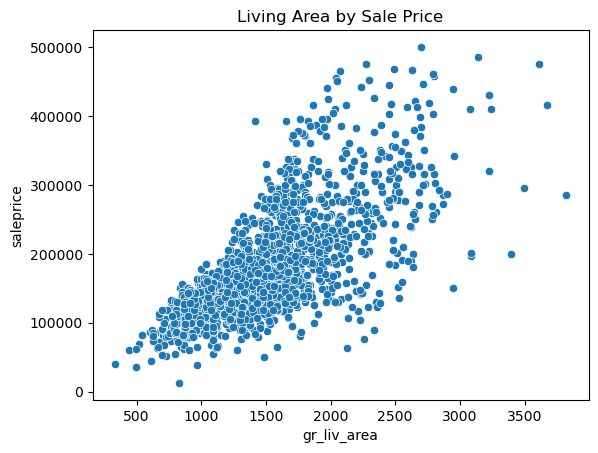

In [187]:
sns.scatterplot(ames['gr_liv_area'], ames.saleprice).set(title = "Living Area by Sale Price");

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


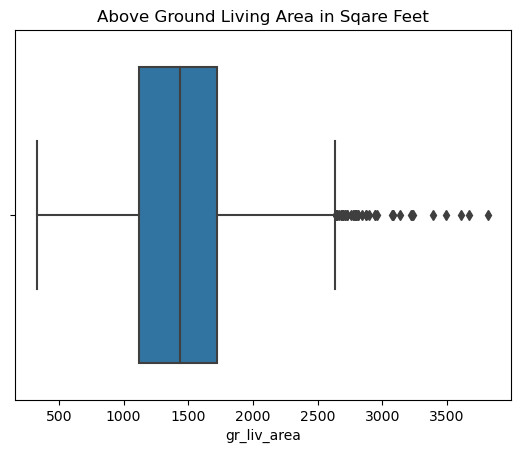

In [186]:
sns.boxplot(ames['gr_liv_area']).set(title = "Above Ground Living Area in Sqare Feet");

In [147]:
grdex = np.where(ames['gr_liv_area']>4000)

print(np.where(ames['gr_liv_area']>4000))

(array([ 896, 1769], dtype=int64),)


In [148]:
ames = ames.drop(ames.index[grdex])

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


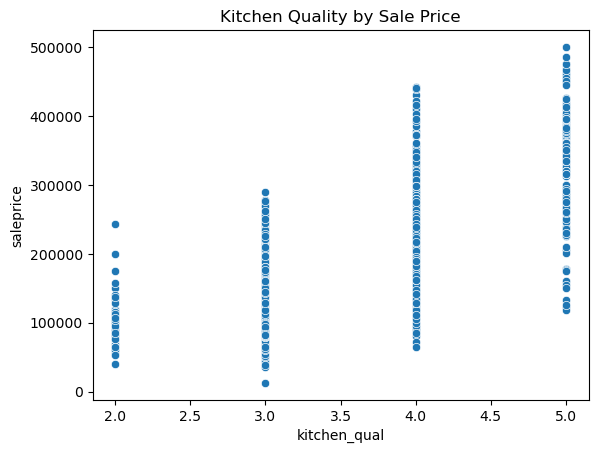

In [184]:
sns.scatterplot(ames['kitchen_qual'], ames.saleprice).set(title = "Kitchen Quality by Sale Price");

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Plot of Kitchen Quality')]

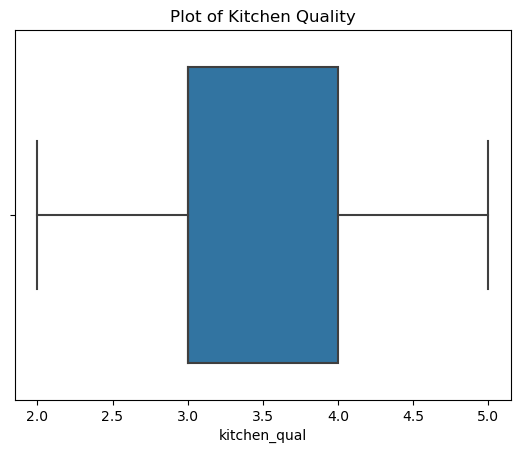

In [183]:
sns.boxplot(ames['kitchen_qual']).set(title = "Plot of Kitchen Quality")

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


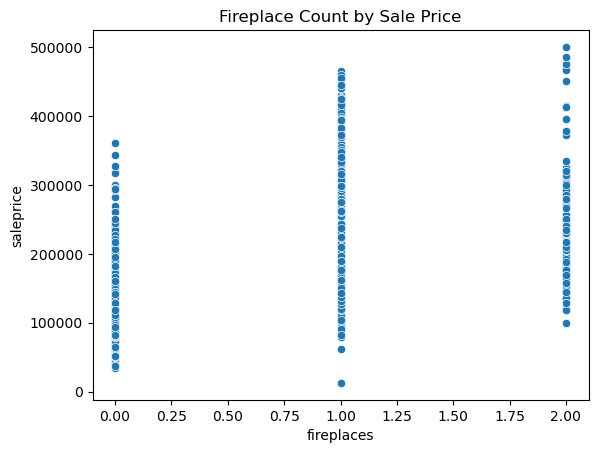

In [182]:
sns.scatterplot(ames['fireplaces'], ames.saleprice).set(title = "Fireplace Count by Sale Price");

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Fireplace Outliers')]

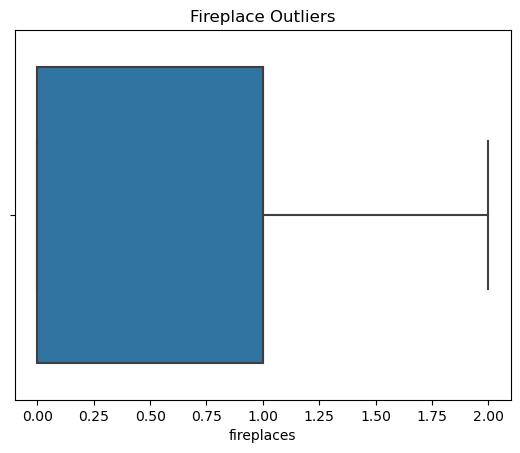

In [178]:
sns.boxplot(ames['fireplaces']).set(title = "Fireplace Outliers")

In [153]:
fdex=np.where(ames['fireplaces']>2.9)
print(np.where(ames['fireplaces']>2.9))

(array([ 706,  932, 1219, 1470, 1621, 1629], dtype=int64),)


In [154]:
ames = ames.drop(ames.index[fdex])

C:\Users\13175\anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot of Saleprice Outliers')]

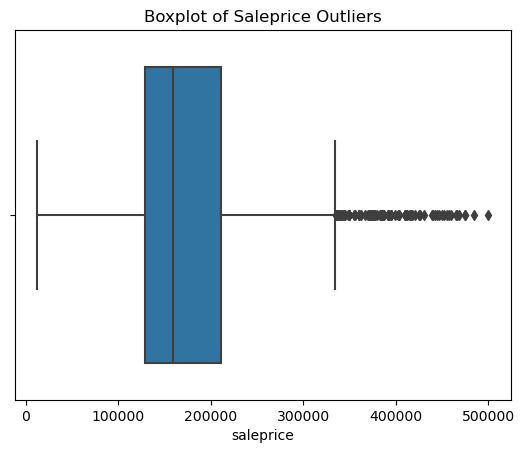

In [180]:
#Seeing some outliers that might skew my results. even the current mean that I am using as a baseline... 
sns.boxplot(ames['saleprice']).set(title='Boxplot of Saleprice Outliers')

In [156]:
spindex=np.where(ames['saleprice']>500000)
print(np.where(ames['saleprice']>500000))

(array([  75,  127,  139,  579,  743,  764, 1084, 1485, 1560, 1581, 1680,
       1837], dtype=int64),)


In [157]:
#Removing saleprice outliers
ames = ames.drop(ames.index[spindex])

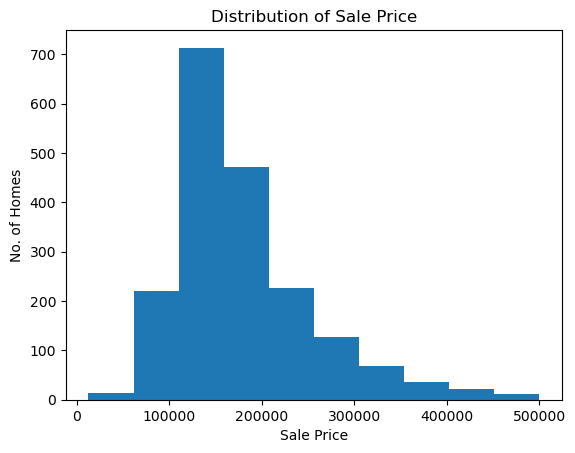

In [158]:
plt.hist(ames['saleprice']);
plt.title(label = "Distribution of Sale Price")
plt.xlabel(xlabel = "Sale Price")
plt.ylabel(ylabel = 'No. of Homes');

In [161]:
#First model attempt
X = ames.drop(columns = ['saleprice'])
y = ames['saleprice']

In [162]:
#Baseline
#print(y.value_counts(normalize= True))
print(ames['saleprice'].mean())

178182.59433962265


In [169]:
# 1st Train test, linear regression 
X_train, X_test, y_train, y_test = train_test_split(X,y)

ols = LinearRegression()
ols.fit(X_train, y_train)
print(ols.score(X_train, y_train))
print(ols.score(X_test, y_test))

y_preds = ols.predict(X_train)
RMSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'RMSE in dollars: {round(RMSE,2)}.')
print(y_preds.mean())

0.9004285276740445
0.8786880909842105
RMSE in dollars: 23240.9.
178991.3319357095


In [164]:
# 2nd Ridge and sc
scr = StandardScaler()
Zr_train = scr.fit_transform(X_train)
Zr_test = scr.transform(X_test)

ridge_model = Ridge(alpha=10)

ridge_model.fit(Zr_train, y_train)

print(ridge_model.score(Zr_train, y_train))
print(ridge_model.score(Zr_test, y_test))

r_preds = ridge_model.predict(Zr_train)
RMSE = metrics.mean_squared_error(y_true=y_train, y_pred=r_preds )**.5
print(f'RMSE in dollars: {round(RMSE,2)}.')
print(r_preds.mean())

0.9067122467221062
0.8597701826023371
RMSE in dollars: 22885.58.
178546.60587002095


In [165]:
# 3rd LassCV and sc
scl = StandardScaler()
Zl_train = scr.fit_transform(X_train)
Zl_test = scr.transform(X_test)

l_alphas = np.logspace(0, 0, 100)

lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=500000)

lasso_cv.fit(Zl_train, y_train);

print(lasso_cv.score(Zl_train, y_train))
print(lasso_cv.score(Zl_test, y_test))

l_preds = lasso_cv.predict(Zl_train)
RMSE = metrics.mean_squared_error(y_true=y_train, y_pred=l_preds )**.5
print(f'RMSE in dollars: {round(RMSE,2)}.')
print(l_preds.mean())

0.9067374190358608
0.8597531709768553
RMSE in dollars: 22882.49.
178546.60587002095


In [166]:
#LinearReg, SS, Poly - Overfit
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)           
poly_train = poly.fit_transform(Z_train)
poly_test = poly.transform(Z_test)

ols2 = LinearRegression()
ols2.fit(poly_train, y_train)
print(ols2.score(poly_train, y_train))
print(ols2.score(poly_test, y_test))

y2_preds = ols2.predict(poly_train)
RMSE = metrics.mean_squared_error(y_true=y_train, y_pred=y2_preds )**.5
print(f'RMSE in dollars: {round(RMSE,2)}.')
print(y_preds.mean())

0.9888303202860785
-2.8900291907398605e+18
RMSE in dollars: 7918.99.
178546.60587002095


In [ ]:
test= test.drop(columns = 'Unnamed: 0')

In [ ]:
test.isnull().sum()

In [ ]:
test['electrical'] = test['electrical'].fillna(0)

In [ ]:
test.shape


In [ ]:
test.isnull().sum()

In [ ]:
lasso_cv.fit(X,y)
X

In [ ]:
test.columns

In [ ]:
final_preds = lasso_cv.predict(test[[
    'id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'lot_shape', 'land_contour', 'utilities', 'land_slope', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc', 'fence', 'misc_val', 'mo_sold', 'yr_sold'
]])

In [ ]:
final_preds.shape

In [ ]:
test['saleprice'] = final_preds

In [ ]:
test.head()

In [ ]:
lasso_sub = test[['id','saleprice']]

In [ ]:
lasso_sub.set_index('id', inplace = True)

In [ ]:
lasso_sub.head()

In [ ]:
#lasso_sub.to_csv('../data/kaggle_submission.csv')